# **Titanic Dataset - Comprehensive Exploratory Data Analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plotting style
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Titanic Celebal/train.csv')

**BASIC DATASET OVERVIEW**

In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Shape: (891, 12)
Number of rows: 891
Number of columns: 12


In [5]:
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())


Column Names and Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  3

**DATA QUALITY ASSESSMENT**

In [6]:
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


In [7]:
# Numerical variables summary
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Variables Summary:")
print(df[numerical_cols].describe())

Numerical Variables Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
# Categorical variables summary
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
    if df[col].nunique() <= 10:
        print(f"  Value counts:\n{df[col].value_counts()}")


Categorical Variables Summary:

Name:
  Unique values: 891
  Most frequent: Abbing, Mr. Anthony

Sex:
  Unique values: 2
  Most frequent: male
  Value counts:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
  Unique values: 681
  Most frequent: 1601

Cabin:
  Unique values: 147
  Most frequent: B96 B98

Embarked:
  Unique values: 3
  Most frequent: S
  Value counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


**VISUALIZATIONS**

In [9]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 25))

<Figure size 2000x2500 with 0 Axes>

Text(0.5, 1.0, 'Survival Distribution')

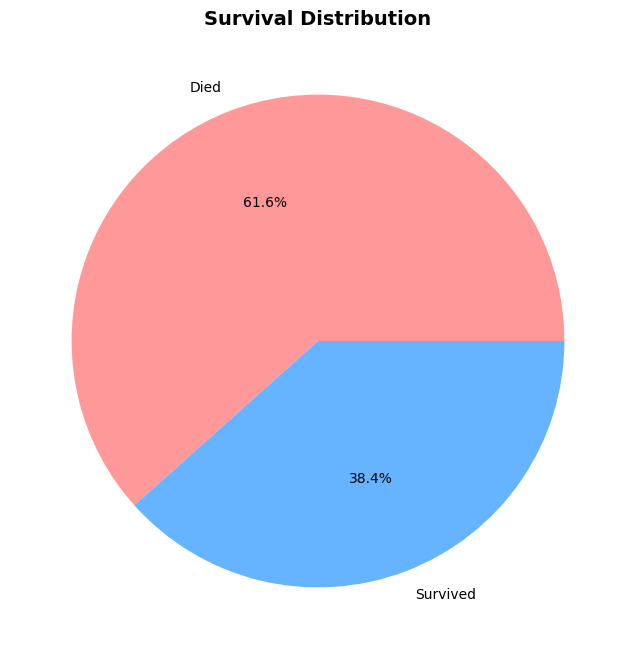

In [10]:
#Survival Distribution
plt.subplot(1, 1, 1)
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'])
plt.title('Survival Distribution', fontsize=14, fontweight='bold')

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

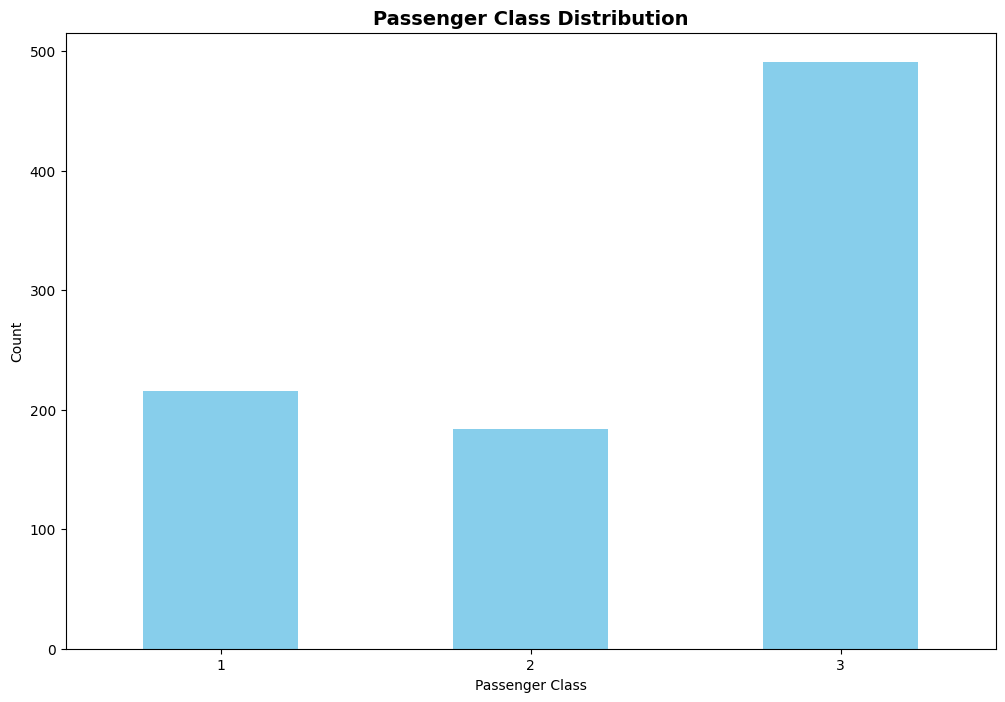

In [11]:
# Passenger Class Distribution
plt.subplot(1, 1, 1)
df['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Passenger Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

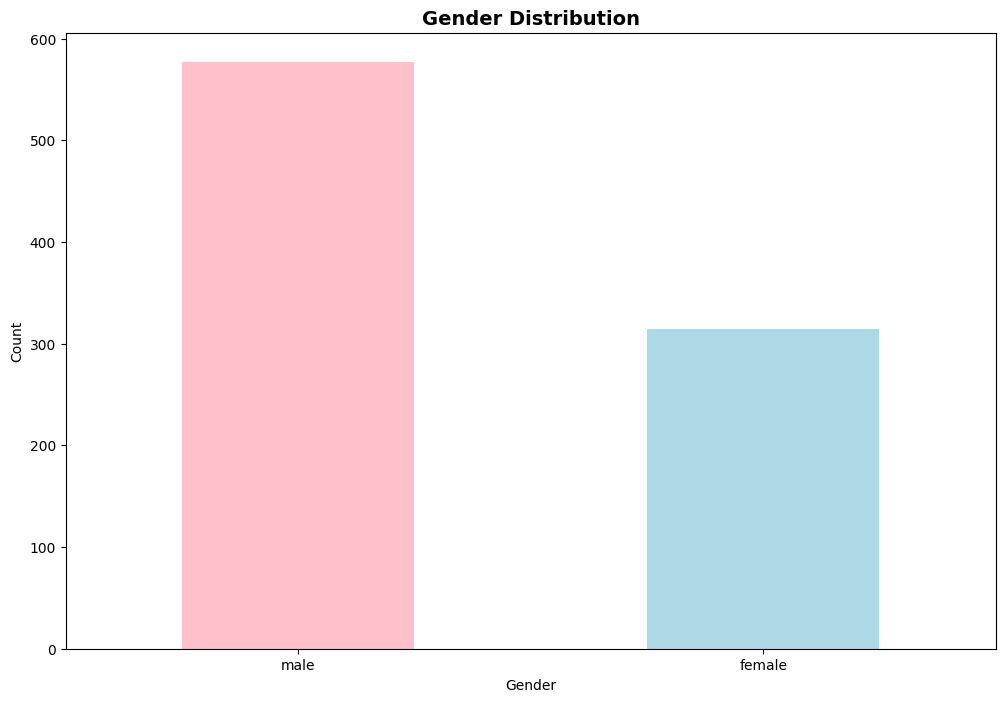

In [12]:
#Gender Distribution
plt.subplot(1, 1, 1)
df['Sex'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

Text(0, 0.5, 'Frequency')

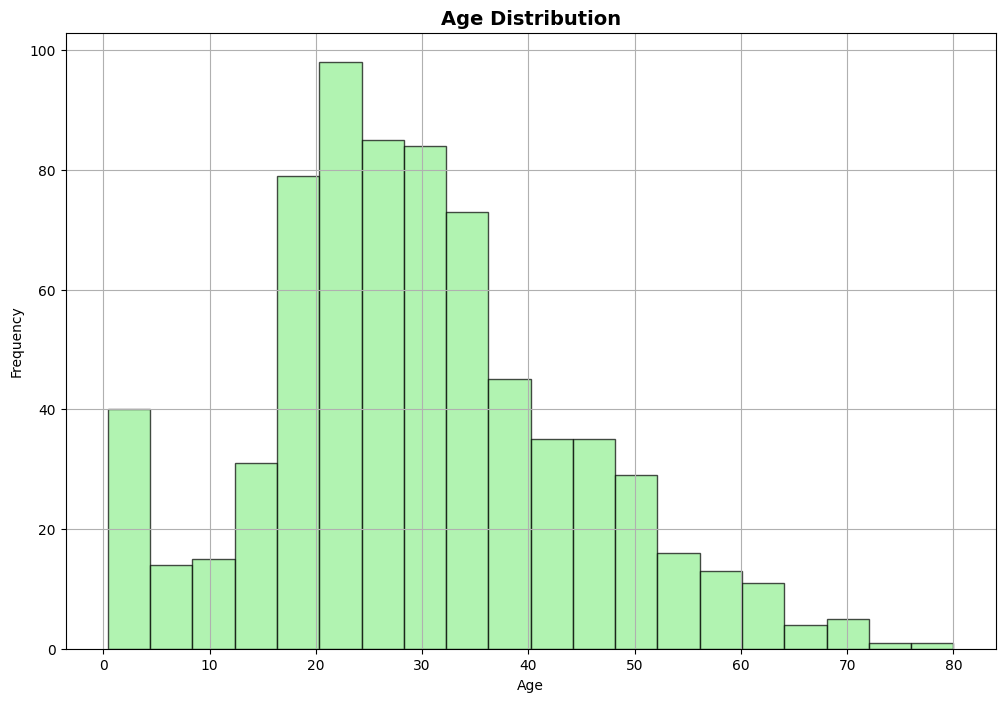

In [13]:
#Age Distribution
plt.subplot(1, 1, 1)
df['Age'].dropna().hist(bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

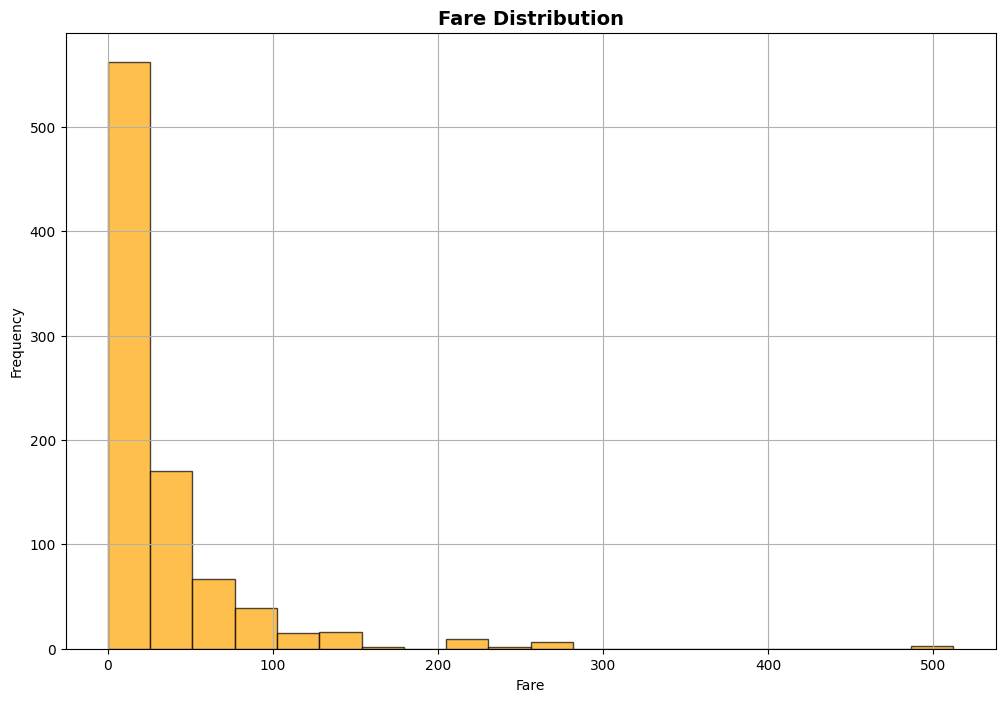

In [14]:
# Fare Distribution
plt.subplot(1, 1, 1)
df['Fare'].hist(bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Fare Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fare')
plt.ylabel('Frequency')

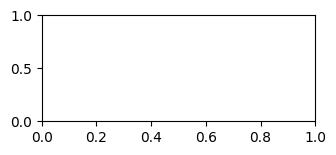

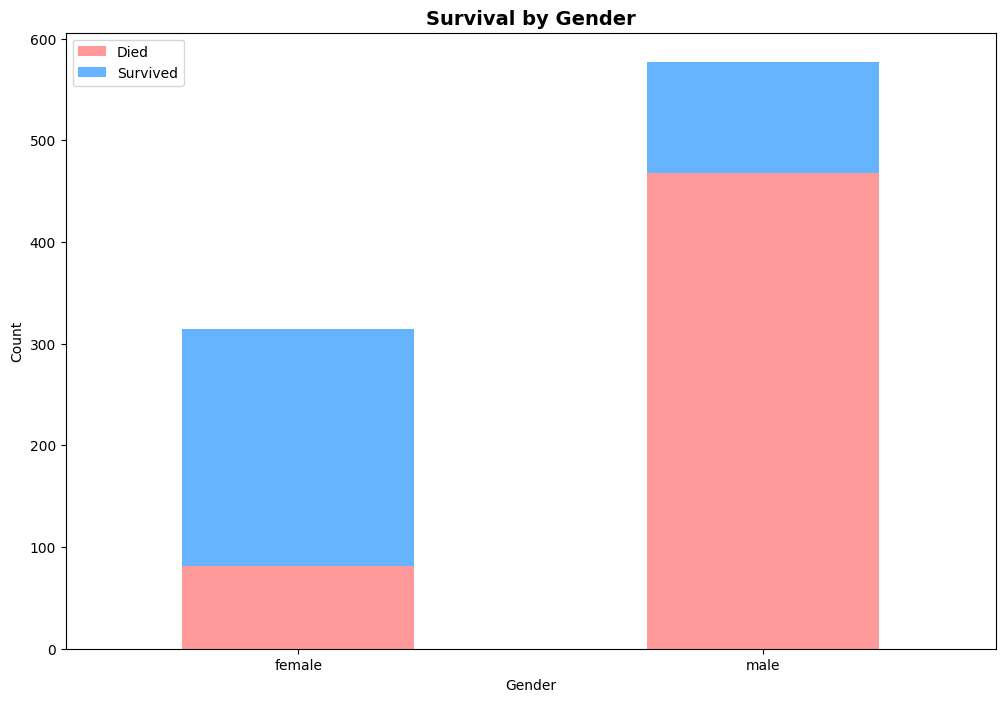

In [15]:
# Survival by Gender
plt.subplot(5, 3, 7)
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

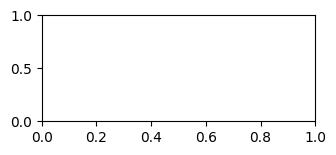

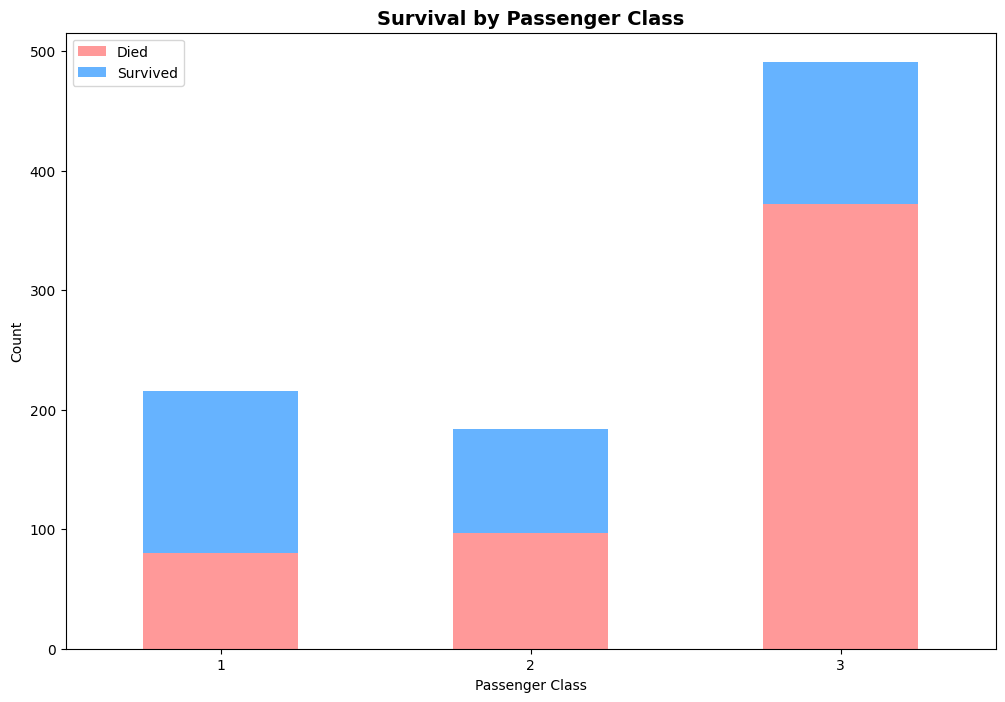

In [16]:
#Survival by Passenger Class
plt.subplot(5, 3, 8)
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

Text(0, 0.5, 'Age')

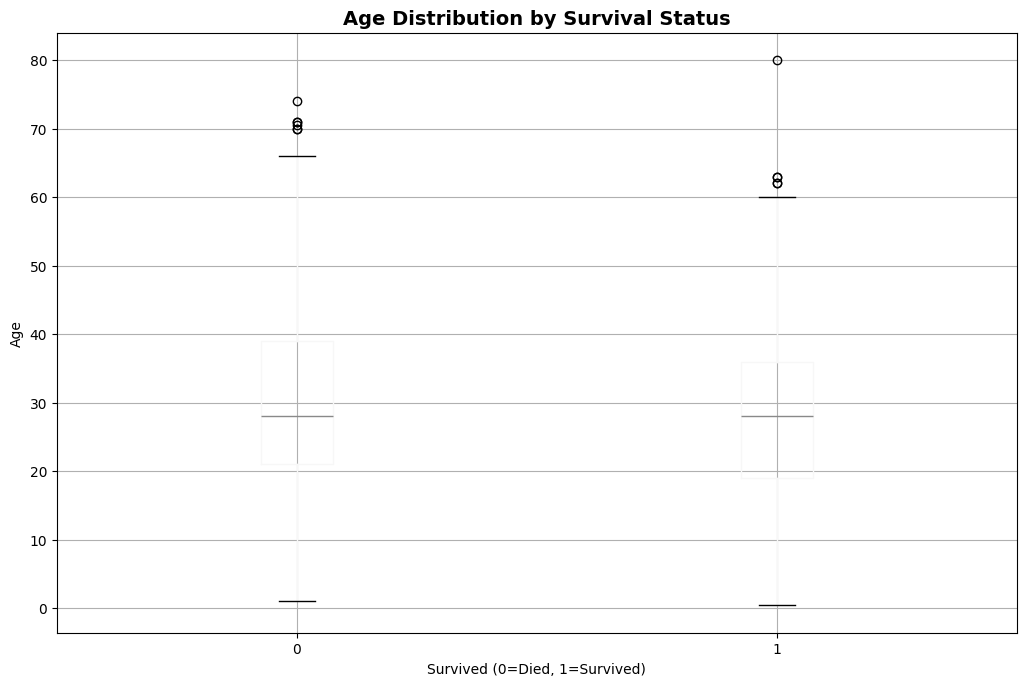

In [17]:
# Age Box Plot by Survival
plt.subplot(1, 1, 1)
df.boxplot(column='Age', by='Survived', ax=plt.gca())
plt.title('Age Distribution by Survival Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Survived (0=Died, 1=Survived)')
plt.ylabel('Age')

Text(0, 0.5, 'Fare')

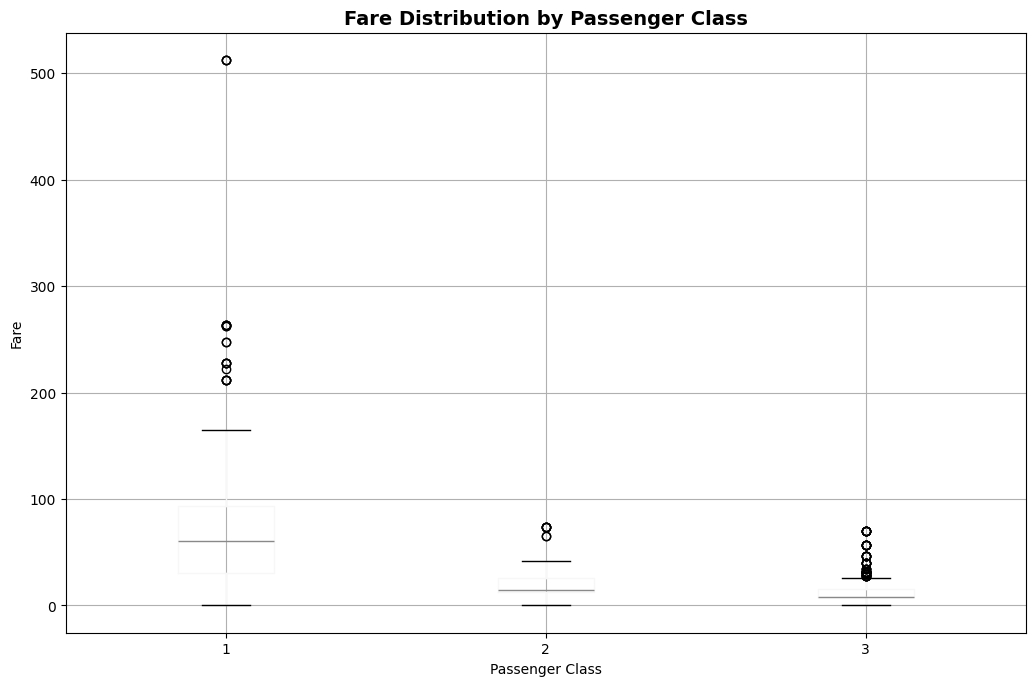

In [18]:
# Fare Box Plot by Passenger Class
plt.subplot(1, 1, 1)
df.boxplot(column='Fare', by='Pclass', ax=plt.gca())
plt.title('Fare Distribution by Passenger Class', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

Text(0.5, 1.0, 'Embarkation Port Distribution')

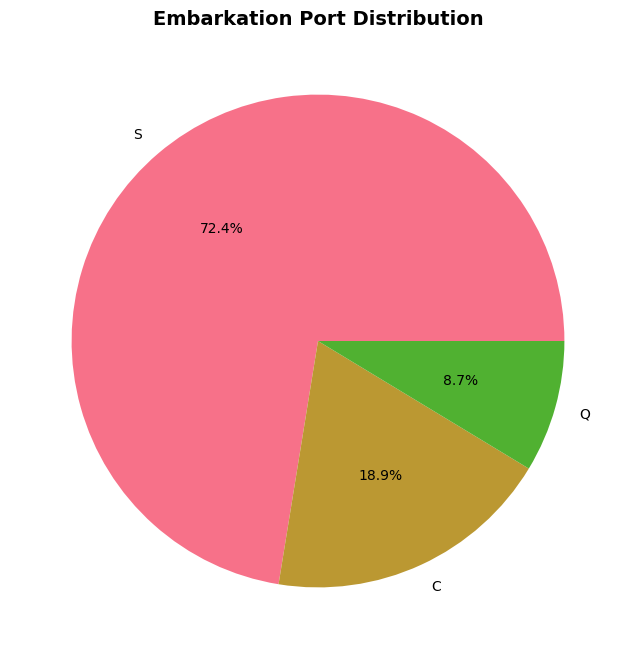

In [19]:
# Embarked Distribution
plt.subplot(1, 1, 1)
embarked_counts = df['Embarked'].value_counts()
plt.pie(embarked_counts.values, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Embarkation Port Distribution', fontsize=14, fontweight='bold')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Young Adult'),
  Text(3, 0, 'Adult'),
  Text(4, 0, 'Senior')])

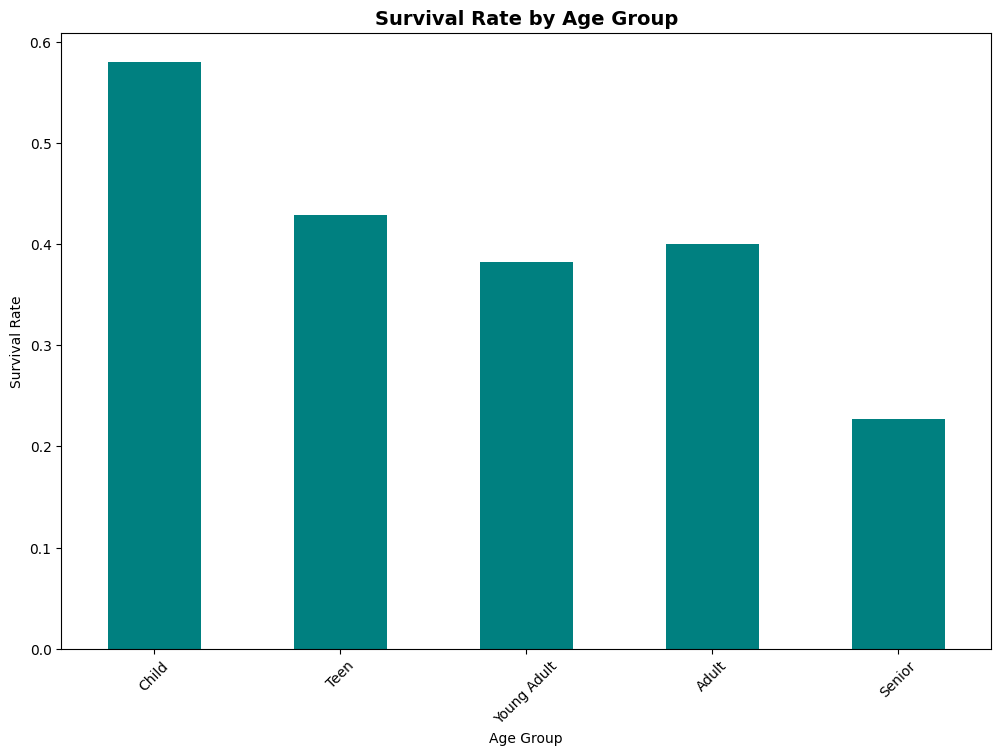

In [20]:
# Survival Rate by Age Groups
plt.subplot(1, 1, 1)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', color='teal')
plt.title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

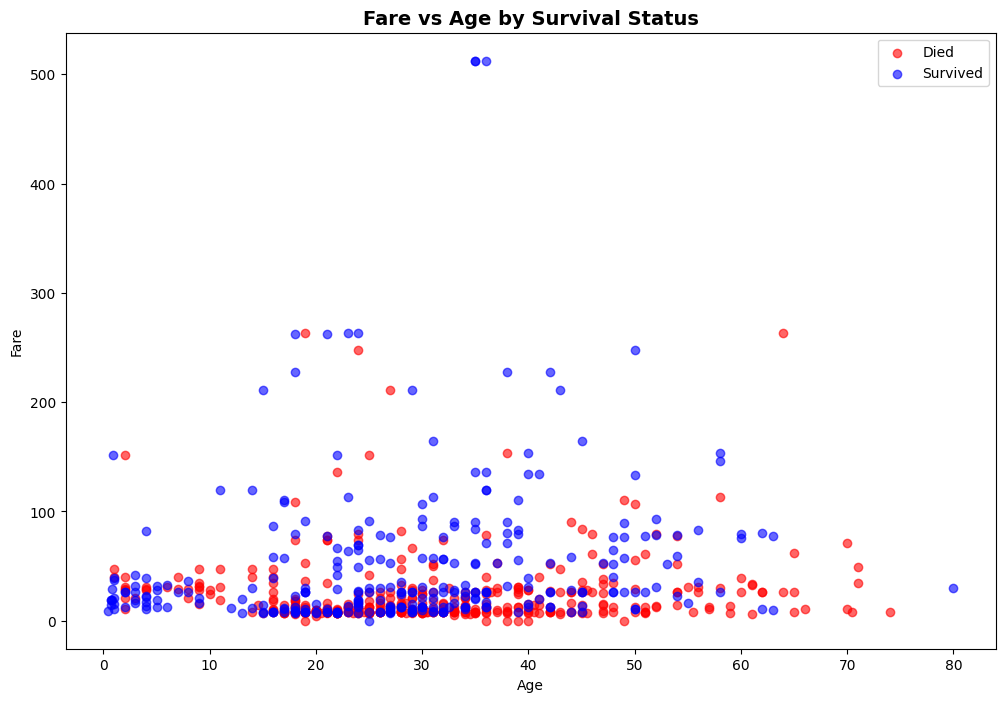

In [21]:
# Fare vs Age Scatter Plot
plt.subplot(1, 1, 1)
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]
plt.scatter(non_survivors['Age'], non_survivors['Fare'], alpha=0.6, c='red', label='Died')
plt.scatter(survivors['Age'], survivors['Fare'], alpha=0.6, c='blue', label='Survived')
plt.title('Fare vs Age by Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

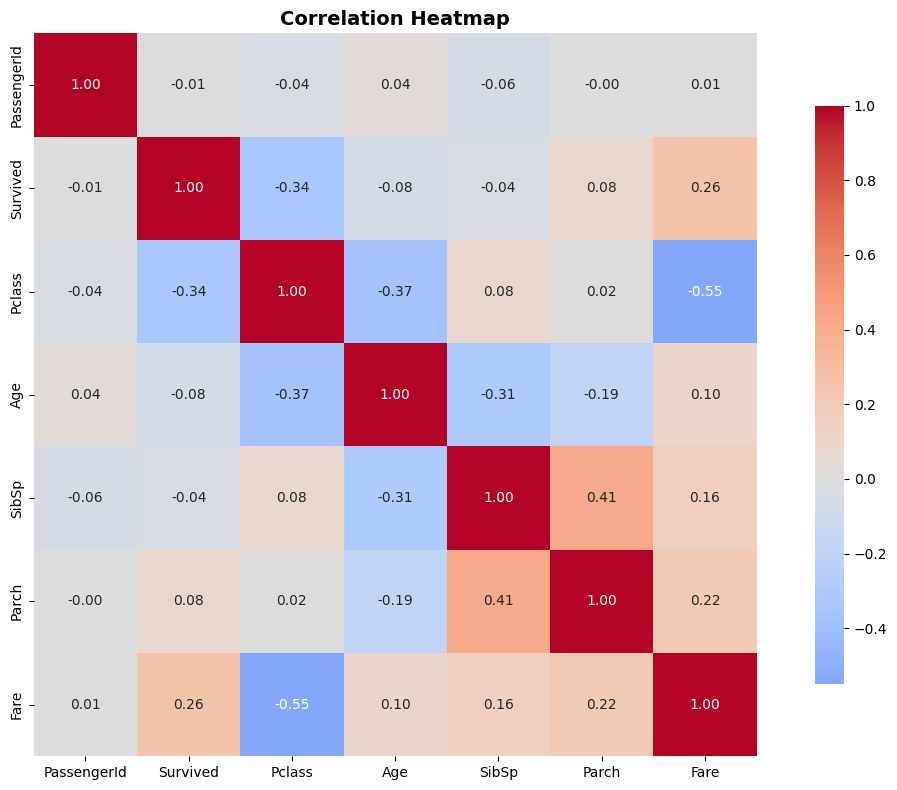

In [22]:
#Correlation Heatmap
plt.subplot(1, 1, 1)
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**OUTLIER DETECTION**

In [23]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    if column not in df.columns or df[column].dtype not in ['int64', 'float64']:
        return pd.Series(dtype=bool)

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

In [24]:
# Detect outliers for numerical columns
for col in numerical_cols:
    if col in df.columns:
        outliers = detect_outliers_iqr(df, col)
        outlier_count = outliers.sum()
        outlier_percentage = (outlier_count / len(df)) * 100
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.1f}%)")

        if outlier_count > 0:
            print(f"  Outlier values: {df[outliers][col].tolist()}")

PassengerId: 0 outliers (0.0%)
Survived: 0 outliers (0.0%)
Pclass: 0 outliers (0.0%)
Age: 11 outliers (1.2%)
  Outlier values: [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]
SibSp: 46 outliers (5.2%)
  Outlier values: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
Parch: 213 outliers (23.9%)
  Outlier values: [1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 

## **ML Pipeline - Outlier Handling & Model Training**

In [25]:
# Import additional libraries for ML
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import time

print("="*80)
print("TITANIC SURVIVAL PREDICTION - ML PIPELINE")
print("="*80)

TITANIC SURVIVAL PREDICTION - ML PIPELINE


In [26]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

def handle_outliers_iqr(data, column, method='cap'):
    """
    Handle outliers using IQR method
    method: 'cap' (capping), 'remove' (removal), or 'transform' (log transformation)
    """
    if column not in data.columns or data[column].dtype not in ['int64', 'float64']:
        return data

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    outliers_count = outliers_mask.sum()

    print(f"{column}: Found {outliers_count} outliers")

    if outliers_count > 0:
        if method == 'cap':
            # Cap outliers at the bounds
            data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
            data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
            print(f"  → Capped {outliers_count} outliers")
        elif method == 'remove':
            # Remove outliers (not recommended for small datasets)
            data = data[~outliers_mask]
            print(f"  → Removed {outliers_count} outliers")
        elif method == 'transform':
            # Log transformation for positive values
            if data[column].min() > 0:
                data[column] = np.log1p(data[column])
                print(f"  → Applied log transformation")

    return data


Age: Found 11 outliers
  → Capped 11 outliers
Fare: Found 116 outliers
  → Capped 116 outliers
SibSp: Found 46 outliers
  → Capped 46 outliers
Parch: Found 213 outliers
  → Capped 213 outliers


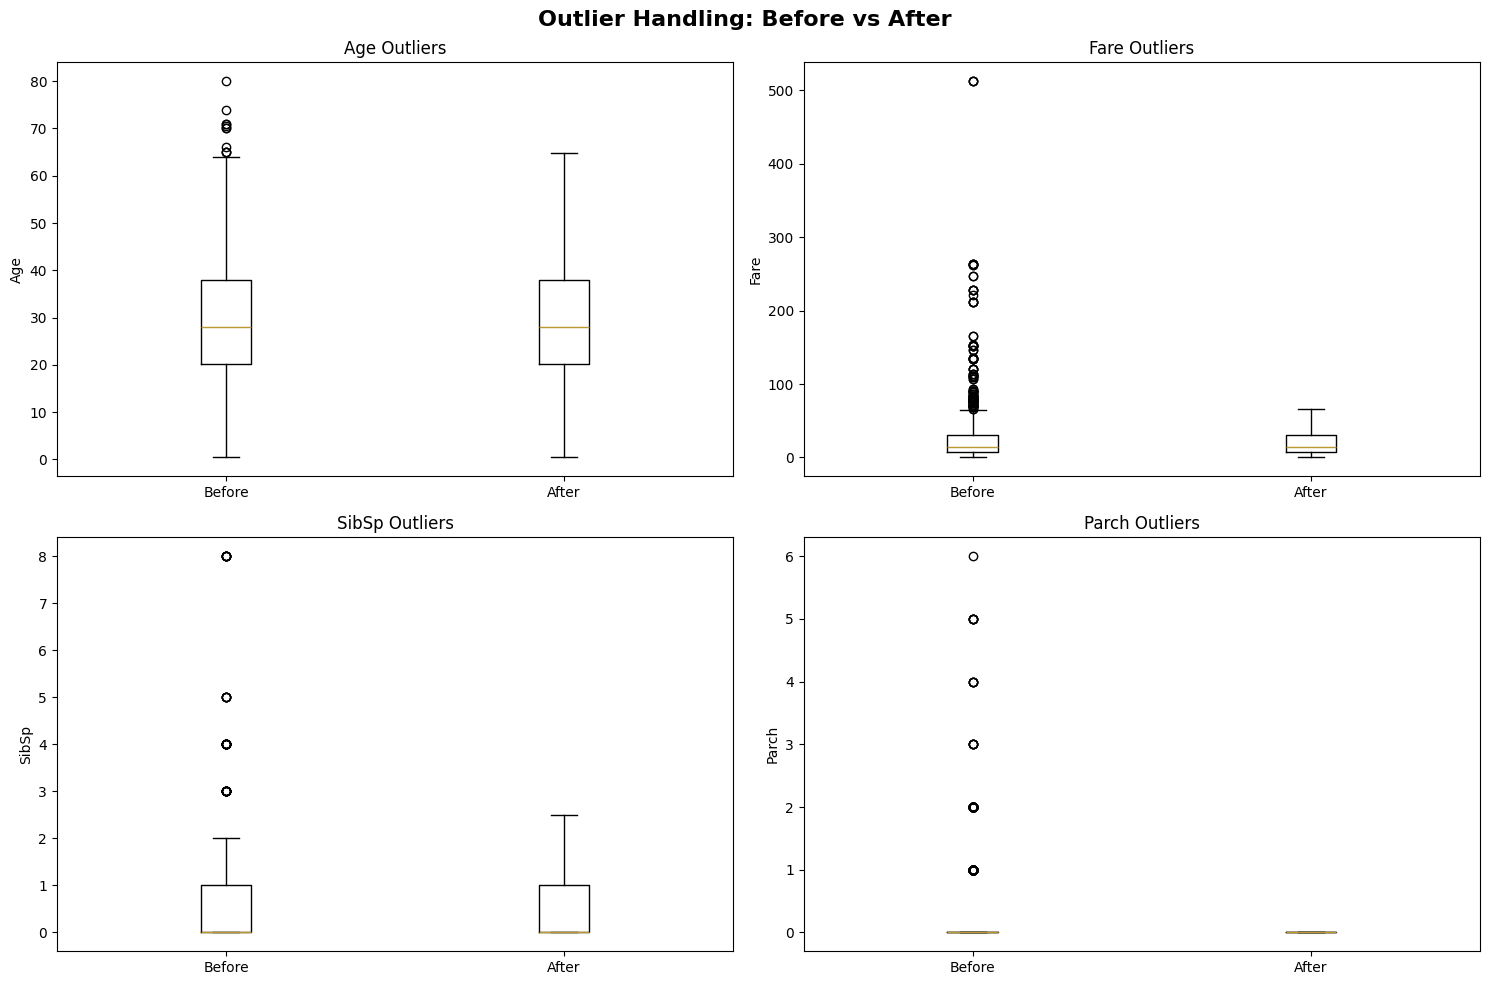


2. FEATURE ENGINEERING
--------------------------------------------------
New features created:
- FamilySize: SibSp + Parch + 1
- IsAlone: Binary indicator for solo travelers
- Title: Extracted from Name
- AgeGroup: Age categories
- FareGroup: Fare quartiles
- FamilySizeGroup: Family size categories


In [27]:
# Handle outliers in numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    if col in df_processed.columns:
        df_processed = handle_outliers_iqr(df_processed, col, method='cap')

# Visualize before and after outlier handling
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Handling: Before vs After', fontsize=16, fontweight='bold')

# Age
axes[0, 0].boxplot([df['Age'].dropna(), df_processed['Age'].dropna()],
                   labels=['Before', 'After'])
axes[0, 0].set_title('Age Outliers')
axes[0, 0].set_ylabel('Age')

# Fare
axes[0, 1].boxplot([df['Fare'].dropna(), df_processed['Fare'].dropna()],
                   labels=['Before', 'After'])
axes[0, 1].set_title('Fare Outliers')
axes[0, 1].set_ylabel('Fare')

# SibSp
axes[1, 0].boxplot([df['SibSp'], df_processed['SibSp']],
                   labels=['Before', 'After'])
axes[1, 0].set_title('SibSp Outliers')
axes[1, 0].set_ylabel('SibSp')

# Parch
axes[1, 1].boxplot([df['Parch'], df_processed['Parch']],
                   labels=['Before', 'After'])
axes[1, 1].set_title('Parch Outliers')
axes[1, 1].set_ylabel('Parch')

plt.tight_layout()
plt.show()

# 2. FEATURE ENGINEERING
print("\n2. FEATURE ENGINEERING")
print("-" * 50)

# Create new features
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# Extract title from Name
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df_processed['Title'] = df_processed['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                       'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                       'Jonkheer', 'Dona'], 'Rare')
df_processed['Title'] = df_processed['Title'].replace('Mlle', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Ms', 'Miss')
df_processed['Title'] = df_processed['Title'].replace('Mme', 'Mrs')

# Age groups
df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                  bins=[0, 12, 18, 35, 60, 100],
                                  labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Fare groups
df_processed['FareGroup'] = pd.qcut(df_processed['Fare'].fillna(df_processed['Fare'].median()),
                                    q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Family size categories
df_processed['FamilySizeGroup'] = 'Medium'
df_processed.loc[df_processed['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
df_processed.loc[df_processed['FamilySize'] <= 4, 'FamilySizeGroup'] = 'Small'
df_processed.loc[df_processed['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Large'

print("New features created:")
print("- FamilySize: SibSp + Parch + 1")
print("- IsAlone: Binary indicator for solo travelers")
print("- Title: Extracted from Name")
print("- AgeGroup: Age categories")
print("- FareGroup: Fare quartiles")
print("- FamilySizeGroup: Family size categories")

**DATA PREPROCESSING FOR ML**

In [28]:
# Select features for modeling
features_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                   'FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'FareGroup', 'FamilySizeGroup']

# Prepare the dataset
X = df_processed[features_to_use].copy()
y = df_processed['Survived'].copy()

print(f"Features selected: {len(features_to_use)}")
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Identify numerical and categorical columns
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup', 'FamilySizeGroup']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. TRAIN-TEST SPLIT
print("\n4. TRAIN-TEST SPLIT")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")


Features selected: 13
Dataset shape: (891, 13)
Target distribution:
Survived
0    549
1    342
Name: count, dtype: int64

4. TRAIN-TEST SPLIT
--------------------------------------------------
Training set size: 712 samples
Test set size: 179 samples
Training target distribution:
Survived
0    439
1    273
Name: count, dtype: int64
Test target distribution:
Survived
0    110
1     69
Name: count, dtype: int64


**MODEL INITIALIZATION**

In [29]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

print(f"Initialized {len(models)} models:")
for model_name in models.keys():
    print(f"- {model_name}")

Initialized 10 models:
- Logistic Regression
- Random Forest
- Gradient Boosting
- SVM
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- AdaBoost
- Extra Trees
- XGBoost


**BASELINE MODEL EVALUATION**

In [30]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
baseline_results = {}
baseline_cv_scores = {}

print("Evaluating baseline models with 5-fold cross-validation...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    # Create pipeline with preprocessing
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Cross-validation scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    baseline_cv_scores[name] = cv_scores

    # Fit on training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Training_Time': time.time() - start_time
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Training Time: {time.time() - start_time:.2f}s")

# Create baseline results DataFrame
baseline_df = pd.DataFrame(baseline_results).T
baseline_df = baseline_df.sort_values('F1-Score', ascending=False)

print("\nBASELINE MODEL COMPARISON:")
print("=" * 80)
print(baseline_df.round(4))

Evaluating baseline models with 5-fold cross-validation...

Training Logistic Regression...
  Accuracy: 0.8547
  F1-Score: 0.7969
  CV Score: 0.8174 (+/- 0.0440)
  Training Time: 1.87s

Training Random Forest...
  Accuracy: 0.8045
  F1-Score: 0.7445
  CV Score: 0.8076 (+/- 0.0451)
  Training Time: 3.67s

Training Gradient Boosting...
  Accuracy: 0.7989
  F1-Score: 0.7143
  CV Score: 0.8202 (+/- 0.0485)
  Training Time: 2.23s

Training SVM...
  Accuracy: 0.8045
  F1-Score: 0.7107
  CV Score: 0.8301 (+/- 0.0509)
  Training Time: 0.57s

Training K-Nearest Neighbors...
  Accuracy: 0.7821
  F1-Score: 0.6929
  CV Score: 0.8133 (+/- 0.0536)
  Training Time: 0.23s

Training Naive Bayes...
  Accuracy: 0.7374
  F1-Score: 0.5437
  CV Score: 0.7626 (+/- 0.0578)
  Training Time: 0.18s

Training Decision Tree...
  Accuracy: 0.7709
  F1-Score: 0.7133
  CV Score: 0.7823 (+/- 0.0411)
  Training Time: 0.22s

Training AdaBoost...
  Accuracy: 0.7933
  F1-Score: 0.7448
  CV Score: 0.7978 (+/- 0.0422)
  Tra

**HYPERPARAMETER TUNING**

In [31]:
# Select top 3 models for hyperparameter tuning
top_models = baseline_df.head(3).index.tolist()
print(f"Selected models for hyperparameter tuning: {top_models}")

# Define parameter grids
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.15],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.15],
        'classifier__max_depth': [3, 5, 7],
        'classifier__subsample': [0.8, 0.9, 1.0]
    }
}

# Hyperparameter tuning results
tuned_results = {}
best_models = {}

for model_name in top_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")
        start_time = time.time()

        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', models[model_name])
        ])

        # GridSearchCV
        grid_search = GridSearchCV(
            pipeline,
            param_grids[model_name],
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=0
        )

        grid_search.fit(X_train, y_train)

        # Best model predictions
        y_pred = grid_search.predict(X_test)
        y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        tuned_results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Best_CV_Score': grid_search.best_score_,
            'Training_Time': time.time() - start_time
        }

        best_models[model_name] = grid_search.best_estimator_

        print(f"  Best CV Score: {grid_search.best_score_:.4f}")
        print(f"  Test F1-Score: {f1:.4f}")
        print(f"  Best Parameters: {grid_search.best_params_}")
        print(f"  Tuning Time: {time.time() - start_time:.2f}s")

Selected models for hyperparameter tuning: ['Logistic Regression', 'XGBoost', 'AdaBoost']

Tuning Logistic Regression...
  Best CV Score: 0.7476
  Test F1-Score: 0.7969
  Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
  Tuning Time: 14.67s

Tuning XGBoost...
  Best CV Score: 0.7605
  Test F1-Score: 0.7704
  Best Parameters: {'classifier__learning_rate': 0.15, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9}
  Tuning Time: 21.34s


**COMPARISON AND VISUALIZATION FOR BEST MODEL**

TUNED MODEL COMPARISON:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
Logistic Regression    0.8547     0.8644  0.7391    0.7969   0.8650   
XGBoost                0.8268     0.7879  0.7536    0.7704   0.8296   

                     Best_CV_Score  Training_Time  
Logistic Regression         0.7476        14.6700  
XGBoost                     0.7605        21.3375  


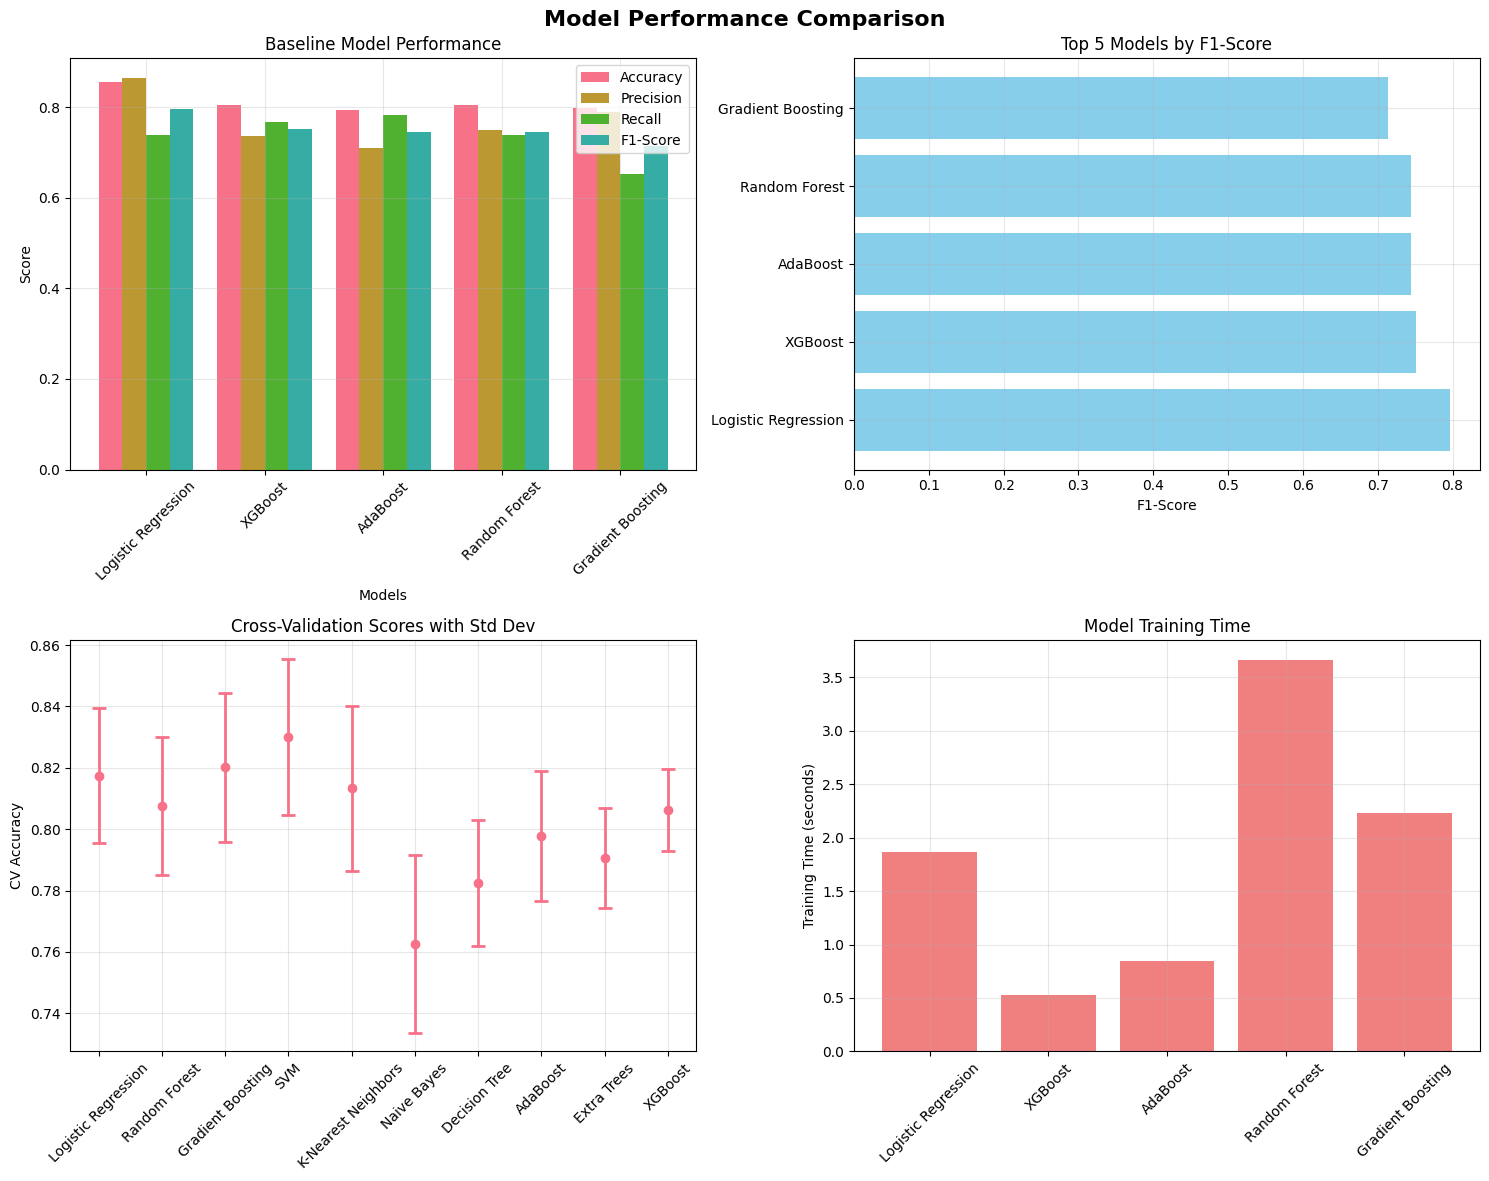

In [32]:
# Create comparison DataFrame
if tuned_results:
    tuned_df = pd.DataFrame(tuned_results).T
    tuned_df = tuned_df.sort_values('F1-Score', ascending=False)

    print("TUNED MODEL COMPARISON:")
    print("=" * 60)
    print(tuned_df.round(4))

# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Baseline model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
baseline_metrics = baseline_df[metrics].head(5)

x_pos = np.arange(len(baseline_metrics.index))
width = 0.2

for i, metric in enumerate(metrics):
    axes[0, 0].bar(x_pos + i*width, baseline_metrics[metric], width, label=metric)

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Baseline Model Performance')
axes[0, 0].set_xticks(x_pos + width * 1.5)
axes[0, 0].set_xticklabels(baseline_metrics.index, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# F1-Score comparison
top_5_models = baseline_df.head(5)
axes[0, 1].barh(range(len(top_5_models)), top_5_models['F1-Score'], color='skyblue')
axes[0, 1].set_yticks(range(len(top_5_models)))
axes[0, 1].set_yticklabels(top_5_models.index)
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Top 5 Models by F1-Score')
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores
cv_means = [baseline_cv_scores[model].mean() for model in baseline_cv_scores.keys()]
cv_stds = [baseline_cv_scores[model].std() for model in baseline_cv_scores.keys()]
model_names = list(baseline_cv_scores.keys())

axes[1, 0].errorbar(range(len(model_names)), cv_means, yerr=cv_stds,
                    fmt='o', capsize=5, capthick=2, elinewidth=2)
axes[1, 0].set_xticks(range(len(model_names)))
axes[1, 0].set_xticklabels(model_names, rotation=45)
axes[1, 0].set_ylabel('CV Accuracy')
axes[1, 0].set_title('Cross-Validation Scores with Std Dev')
axes[1, 0].grid(True, alpha=0.3)

# Training time comparison
training_times = baseline_df['Training_Time'].head(5)
axes[1, 1].bar(range(len(training_times)), training_times.values, color='lightcoral')
axes[1, 1].set_xticks(range(len(training_times)))
axes[1, 1].set_xticklabels(training_times.index, rotation=45)
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Model Training Time')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Best Model: Logistic Regression
Best F1-Score: 0.7969

DETAILED EVALUATION - Logistic Regression:
Accuracy: 0.8547
Precision: 0.8644
Recall: 0.7391
F1-Score: 0.7969
ROC-AUC: 0.8650

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.86      0.74      0.80        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



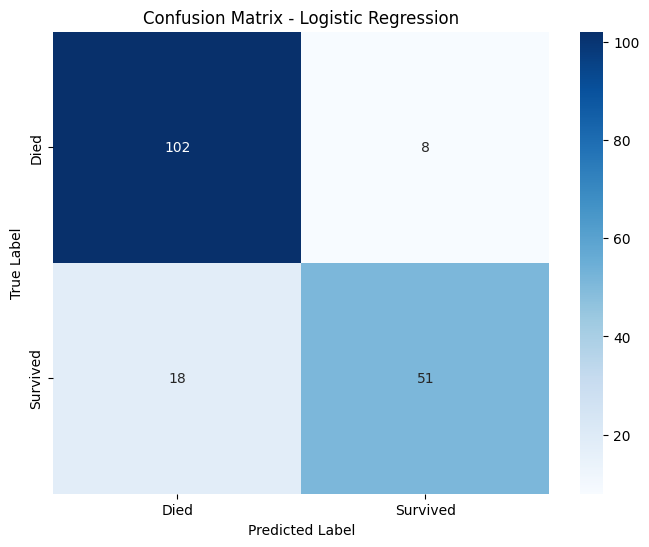

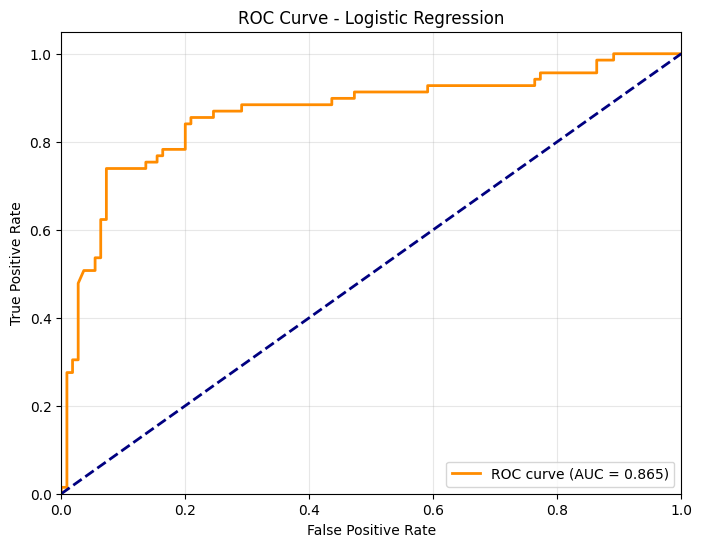

In [33]:
# Select the best model
if tuned_results:
    best_model_name = tuned_df.index[0]
    best_model = best_models[best_model_name]
    print(f"Best Model: {best_model_name}")
    print(f"Best F1-Score: {tuned_df.loc[best_model_name, 'F1-Score']:.4f}")
else:
    best_model_name = baseline_df.index[0]
    best_model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', models[best_model_name])
    ])
    best_model.fit(X_train, y_train)
    print(f"Best Model: {best_model_name}")
    print(f"Best F1-Score: {baseline_df.loc[best_model_name, 'F1-Score']:.4f}")

# Detailed evaluation of best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print(f"\nDETAILED EVALUATION - {best_model_name}:")
print("=" * 60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba_best):.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()